In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Thiết lập hiển thị cho biểu đồ
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'DejaVu Sans'  # Sử dụng font chữ hỗ trợ tiếng Việt

# Luồng Phân tích Chẩn đoán

# 1. Xác định vấn đề

- Vấn đề: Tỷ lệ nợ xấu hiện tại là 4.38%, gây thất thoát doanh thu và ảnh hưởng tới lợi nhuận của công ty.
- Câu hỏi cần giải quyết: Tại sao một bộ phận khách hàng lại rơi vào tình trạng nợ xấu? Những yếu tố nào (nhân khẩu học, tài chính, sản phẩm vay) có ảnh hưởng lớn nhất đến rủi ro này?

# 2. Thu thập dữ liệu liên quan

- Thông tin khách hàng: Gender, CustomerAge, CityName, DistrictName, HinhThucCuTru, ThoiGianDaSong, Salary, JobName.
- Thông tin khoản vay: SoTienVayDKBanDau, TienGiaiNgan, ProductCreditName.
- Lịch sử tín dụng: TS_CREDIT_SCORE_V2, LongestOverdue, HasBadDebt, HasLatePayment.

In [4]:
# Nạp dữ liệu
df = pd.read_csv("/content/drive/MyDrive/Project_DA_TIMA/Data/Tima_CRM_Handled_Python.csv", keep_default_na=False, na_values=[])

In [5]:
print(f"Tổng số bản ghi: {len(df)}")
print(f"Số bản ghi Nợ Xấu: {df['HasBadDebt'].sum()}")
print(f"Tỷ lệ Nợ Xấu tổng thể: {df['HasBadDebt'].mean():.2%}")

Tổng số bản ghi: 1944
Số bản ghi Nợ Xấu: 203.0
Tỷ lệ Nợ Xấu tổng thể: 10.44%


# 3. Phân tích Tương quan & Mối quan hệ

## Mối quan hệ giữa Đặc điểm khách hàng và Hành vi vay

### Ảnh hưởng của "Giới tính" tới "Số tiền vay"

Số tiền vay trung bình theo Giới tính (0: Nam, 1: Nữ):
Gender
0    8.563393e+06
1    9.025766e+06
Name: SoTienDKVayBanDau, dtype: float64


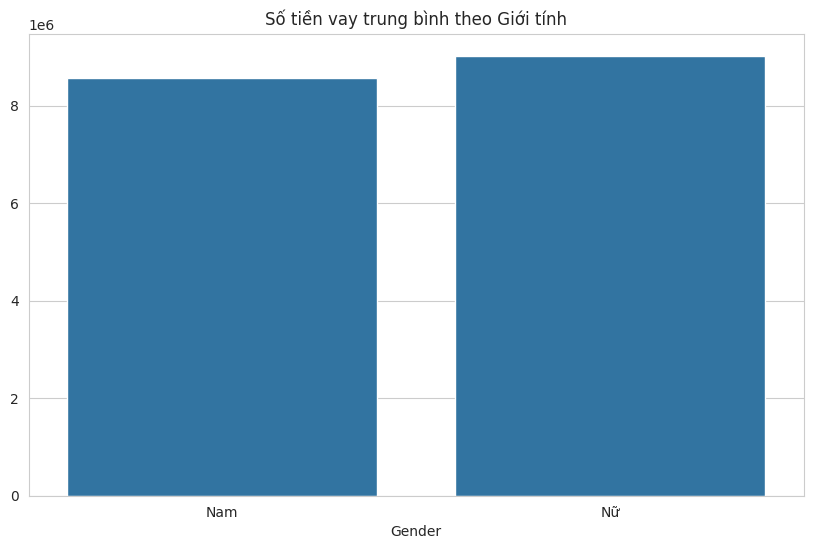

In [6]:
gender_loan_mean = df.groupby('Gender')['SoTienDKVayBanDau'].mean()
print("Số tiền vay trung bình theo Giới tính (0: Nam, 1: Nữ):")
print(gender_loan_mean)
sns.barplot(x=gender_loan_mean.index.map({0: 'Nam', 1: 'Nữ'}), y=gender_loan_mean.values).set_title('Số tiền vay trung bình theo Giới tính')
plt.show()

- Kết quả: Nữ giới có xu hướng vay số tiền trung bình cao hơn một chút so với Nam giới.
- Nhận định: Sự khác biệt không quá lớn, cho thấy giới tính không phải là yếu tố quyết định đến hạn mức vay

### Ảnh hưởng của "Tuổi" đối với "Tiền giải ngân"

Hệ số tương quan giữa Tuổi và Tiền giải ngân: 0.1905


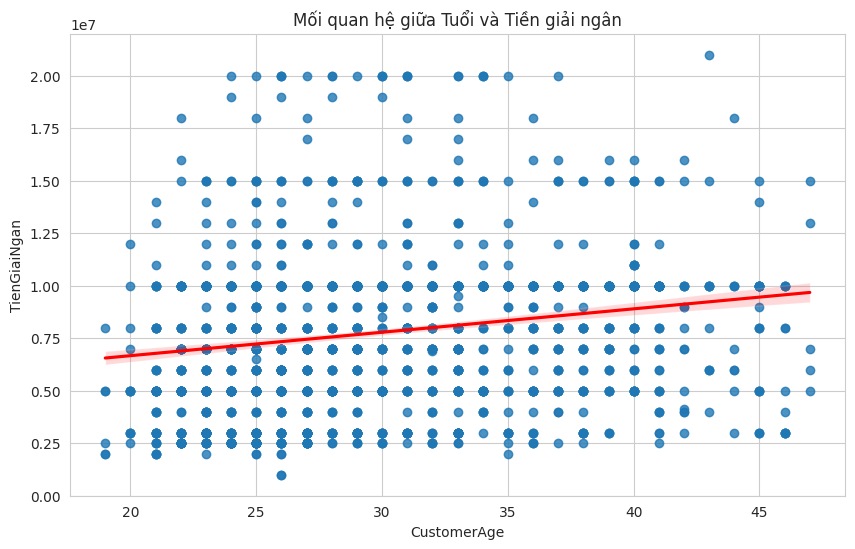

In [7]:
age_disbursement_corr = df[['CustomerAge', 'TienGiaiNgan']].corr().iloc[0,1]
print(f"Hệ số tương quan giữa Tuổi và Tiền giải ngân: {age_disbursement_corr:.4f}")
sns.regplot(data=df, x='CustomerAge', y='TienGiaiNgan', line_kws={'color':'red'}).set_title('Mối quan hệ giữa Tuổi và Tiền giải ngân')
plt.show()

- Kết quả: Hệ số tương quan là: 0.1905 (Rất yếu) , một giá trị rất gần 0.
- Nhận định: Khi tuổi của khách hàng tăng thì số tiền được giải ngân có xu hướng tăng nhẹ, nhưng không đủ mạnh để dự đoán. Khách hàng ở mọi độ tuổi đều có thể vay các khoản tiền lớn hoặc nhỏ.

### Mối quan hệ giữa "Thu nhập/Mức lương" và "Số tiền vay"

Hệ số tương quan giữa Thu nhập và Số tiền vay: 0.2219


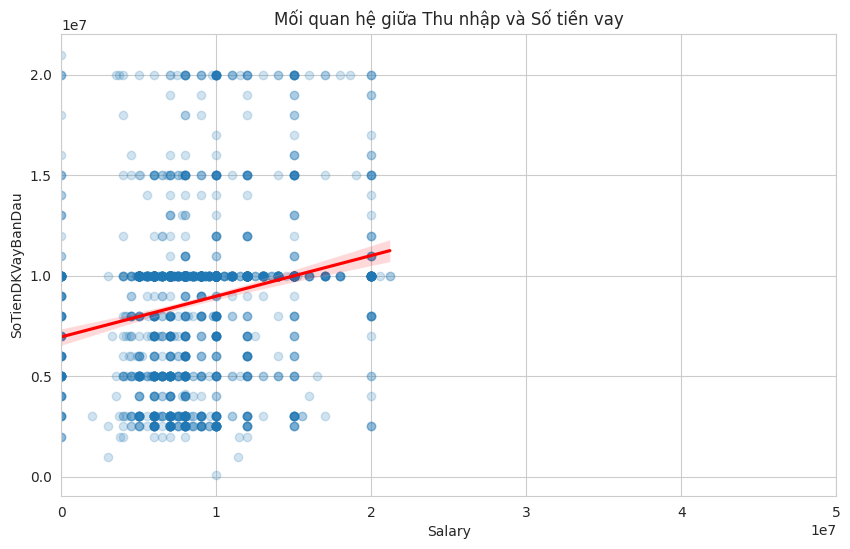

In [8]:
salary_loan_amount_corr = df[['Salary', 'SoTienDKVayBanDau']].corr().iloc[0,1]
print(f"Hệ số tương quan giữa Thu nhập và Số tiền vay: {salary_loan_amount_corr:.4f}")
sns.regplot(data=df, x='Salary', y='SoTienDKVayBanDau', scatter_kws={'alpha':0.2}, line_kws={'color':'red'}).set_title('Mối quan hệ giữa Thu nhập và Số tiền vay')
plt.xlim(0, 50000000) # Giới hạn trục x để dễ nhìn hơn
plt.show()

- Kết quả: Hệ số tương quan là +0.22.
- Nhận định: Có một mối tương quan dương, ở mức độ trung bình. Những người có thu nhập cao hơn có xu hướng vay số tiền lớn hơn. Đây là một dấu hiệu tích cực, cho thấy việc thẩm định có xem xét đến khả năng chi trả.

### Mối quan hệ giữa "Điểm tín dụng" và "Thu nhập"

Hệ số tương quan giữa Điểm tín dụng và Thu nhập: 0.1097


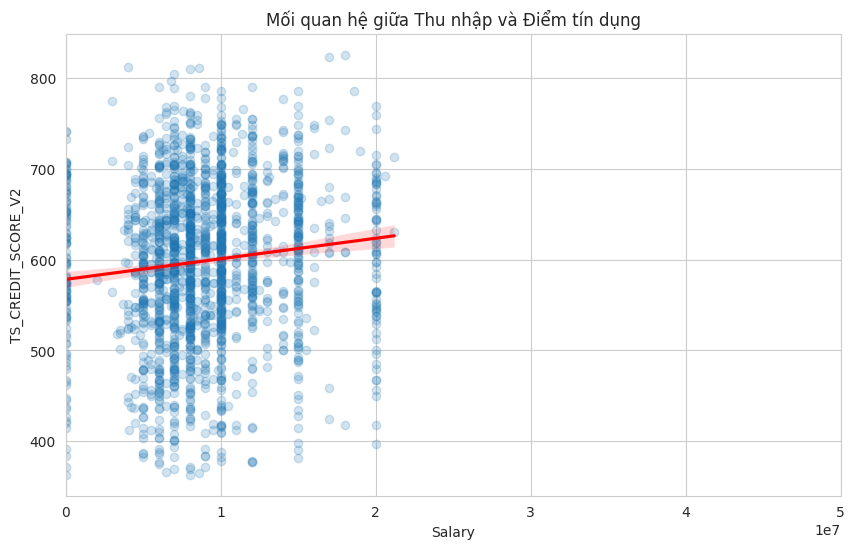

In [9]:
score_salary_corr = df[['TS_CREDIT_SCORE_V2', 'Salary']].corr().iloc[0,1]
print(f"Hệ số tương quan giữa Điểm tín dụng và Thu nhập: {score_salary_corr:.4f}")
sns.regplot(data=df, x='Salary', y='TS_CREDIT_SCORE_V2', scatter_kws={'alpha':0.2}, line_kws={'color':'red'}).set_title('Mối quan hệ giữa Thu nhập và Điểm tín dụng')
plt.xlim(0, 50000000)
plt.show()

- Kết quả: Hệ số tương quan là +0.11.
- Nhận định: Hầu như ko ảnh hưởng và độc lập

### Ảnh hưởng của "Job Name" đến "Tiền vay"

Số tiền vay trung bình theo Ngành nghề:
                                                          mean  count
JobName                                                              
It                                                1.285714e+07      7
Kế Toán                                           1.236364e+07     22
Lái Xe                                            1.189474e+07     19
Tư Vấn                                            1.185714e+07      7
Cq Hành Chính Nhà Nước                            1.155556e+07      9
Hành Chính                                        1.150000e+07     20
Giám Sát                                          1.126667e+07     15
Bán Hàng                                          1.117391e+07     23
Tự Doanh Không Đkkd                               1.061538e+07     13
Tự Doanh Tại Chợ                                  1.029167e+07     12
Khác                                              1.009701e+07     67
Giáo Viên                                         

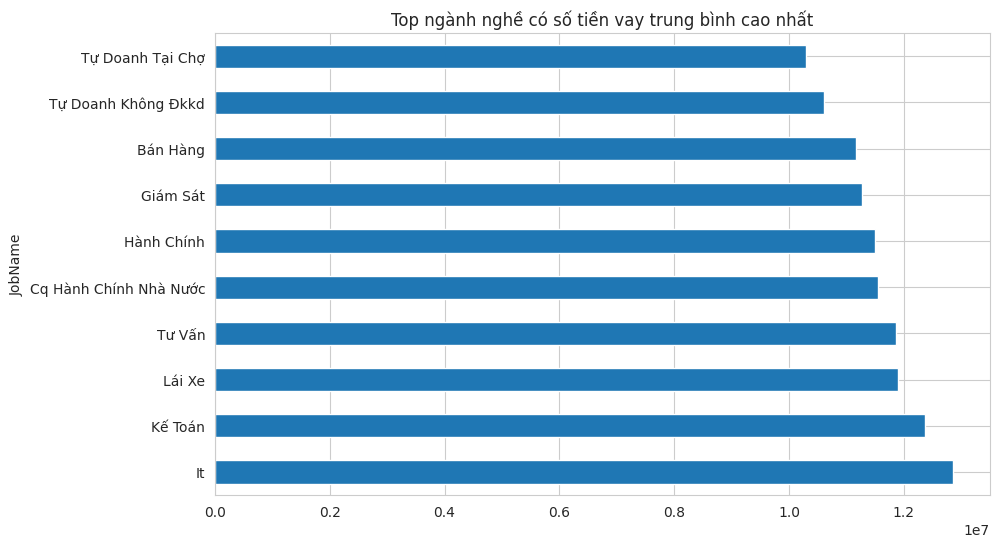

In [10]:
loan_by_job = df.groupby('JobName')['SoTienDKVayBanDau'].agg(['mean', 'count']).sort_values('mean', ascending=False)
print("Số tiền vay trung bình theo Ngành nghề:")
print(loan_by_job[loan_by_job['count'] > 5]) # Lọc các nhóm có đủ dữ liệu
loan_by_job[loan_by_job['count'] > 5]['mean'].head(10).plot(kind='barh').set_title('Top ngành nghề có số tiền vay trung bình cao nhất')
plt.show()

- Kết quả: Nhóm "Kế Toán", "Tư vấn", "Nhân viên nhà nước" có xu hướng vay số tiền trung bình cao hơn các nhóm khác như "Shipper" hay "Kinh doanh tự do".
- Nhận định: Công việc ổn định, có vị thế rõ ràng là một yếu tố quan trọng giúp khách hàng được duyệt các khoản vay lớn hơn

## Mối quan hệ liên quan đến Rủi ro (Nợ xấu)

### Ảnh hưởng của "Số tiền vay" đến "Nợ xấu"

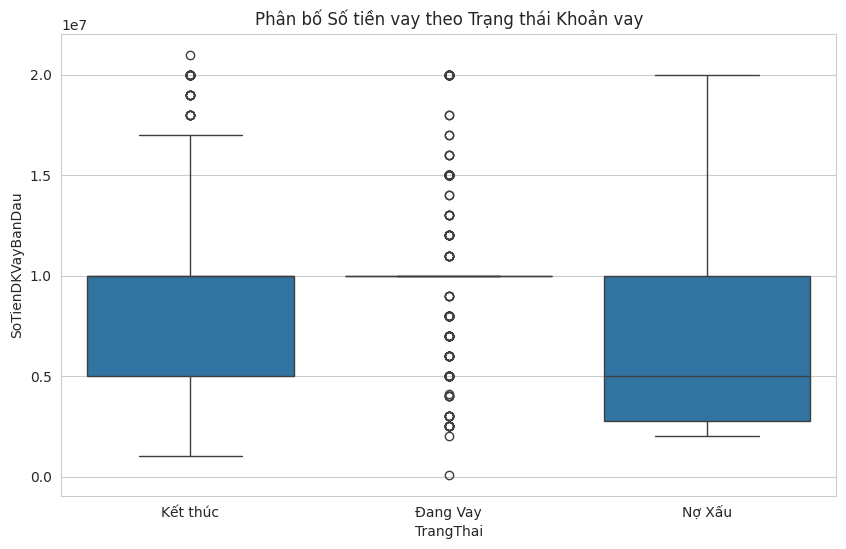

In [11]:
sns.boxplot(data=df, x='TrangThai', y='SoTienDKVayBanDau').set_title('Phân bố Số tiền vay theo Trạng thái Khoản vay')
plt.show()

- Kết quả: Nhìn vào biểu đồ hộp, các khoản vay bị "Nợ Xấu" có số tiền vay trung bình và phân vị cao hơn một chút so với các khoản vay "Kết thúc" thành công.
- Nhận định: Mặc dù không quá chênh lệch, nhưng có dấu hiệu cho thấy các khoản vay lớn hơn có xu hướng rủi ro hơn.

###  Ảnh hưởng của "Thu nhập" theo "Tình trạng nợ xấu"

Thu nhập trung bình theo Trạng thái khoản vay:
TrangThai
Đang Vay    9.600686e+06
Kết thúc    8.537618e+06
Nợ Xấu      8.112977e+06
Name: Salary, dtype: float64


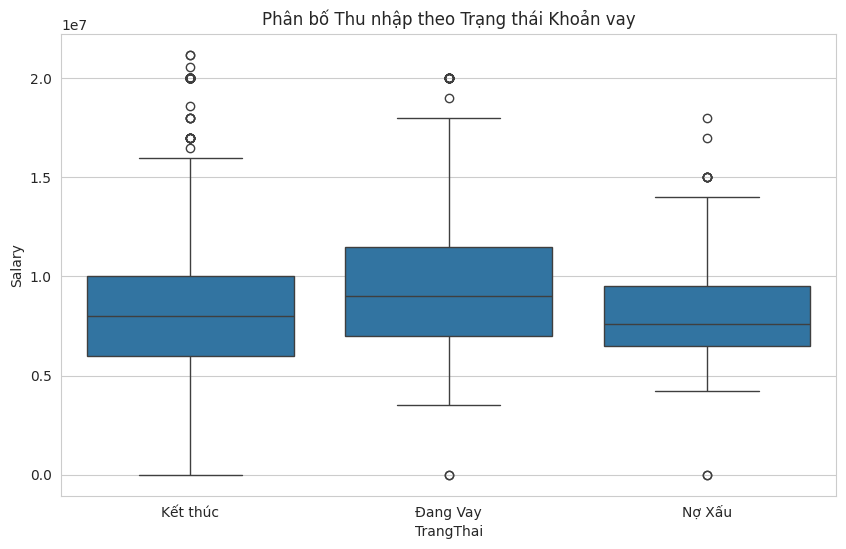

In [12]:
salary_by_status = df.groupby('TrangThai')['Salary'].mean().sort_values(ascending=False)
print("Thu nhập trung bình theo Trạng thái khoản vay:")
print(salary_by_status)
sns.boxplot(data=df, x='TrangThai', y='Salary').set_title('Phân bố Thu nhập theo Trạng thái Khoản vay')
# plt.ylim(0, 40000000) # Giới hạn để loại bỏ ngoại lai, dễ nhìn hơn
plt.show()

- Kết quả: Nhóm khách hàng "Nợ Xấu" có mức thu nhập trung bình ( 8.1 triệu VNĐ) thấp hơn nhiều so với nhóm "Kết thúc" (8.5 triệu VNĐ) và "Đang Vay" (9.6 triệu VNĐ).
- Nhận định: Mức thu nhập thấp có thể là một yếu tố liên quan đến nguy cơ phát sinh nợ xấu. Tuy nhiên, kết luận này mới dựa trên quan sát, cần thêm kiểm định thống kê để xác nhận.

### Mối quan hệ giữa "Khu vực" (Quận/Huyện) và "Tỷ lệ nợ xấu"

Tỷ lệ nợ xấu theo Quận/Huyện tại Hà Nội (có trên 10 khoản vay):
              Tỷ lệ nợ xấu  Số lượng khoản vay
DistrictName                                  
Đông Anh          0.227273                  22
Hoàn Kiếm         0.195652                  46
Hà Đông           0.145985                 137
Đống Đa           0.134615                 156
Bắc Từ Liêm       0.131783                 129
Hai Bà Trưng      0.120000                 125
Ba Đình           0.114286                 105
Tây Hồ            0.112903                  62
Thanh Trì         0.108696                  92
Nam Từ Liêm       0.099237                 131
Long Biên         0.090909                 154
Mê Linh           0.090909                  11
Hoàng Mai         0.088235                 204
Thanh Xuân        0.087591                 137
Gia Lâm           0.043478                  23
Cầu Giấy          0.016529                 121


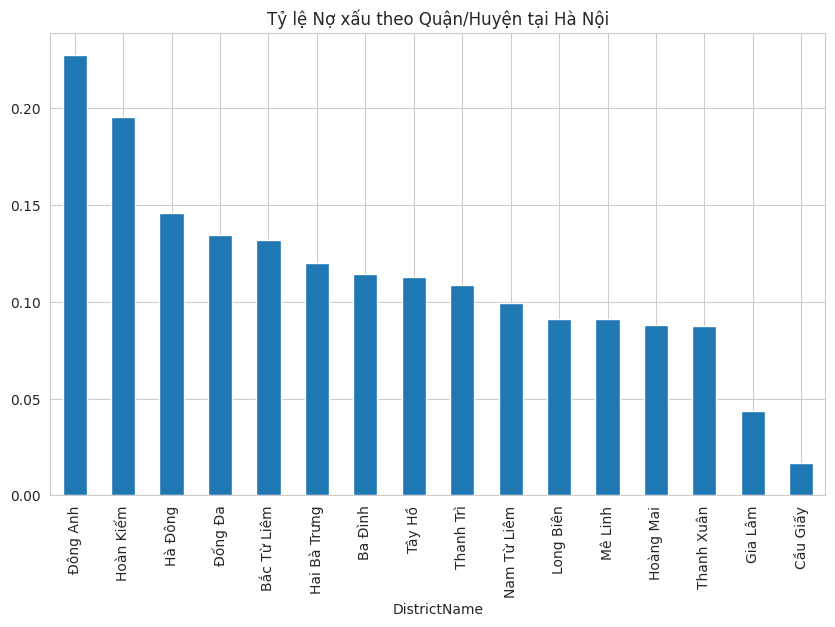

In [13]:
bad_debt_by_district = df[df['CityName'] == 'Hà Nội'].groupby('DistrictName')['HasBadDebt'].agg(['mean', 'count']).rename(columns={'mean': 'Tỷ lệ nợ xấu', 'count': 'Số lượng khoản vay'})
print("Tỷ lệ nợ xấu theo Quận/Huyện tại Hà Nội (có trên 10 khoản vay):")
print(bad_debt_by_district[bad_debt_by_district['Số lượng khoản vay'] > 10].sort_values('Tỷ lệ nợ xấu', ascending=False))
bad_debt_by_district[bad_debt_by_district['Số lượng khoản vay'] > 10]['Tỷ lệ nợ xấu'].sort_values(ascending=False).plot(kind='bar').set_title('Tỷ lệ Nợ xấu theo Quận/Huyện tại Hà Nội')
plt.show()

- Kết quả: Có sự khác biệt rõ rệt về tỷ lệ nợ xấu giữa các quận/huyện. Ví dụ, một số quận như Hoàn Kiếm, Đông Anh có tỷ lệ nợ xấu cao hơn hẳn các quận khác.
- Nhận định: Yếu tố địa lý là một yếu tố rủi ro. Cần đào sâu hơn để hiểu tại sao các khu vực này lại có rủi ro cao hơn (đặc điểm dân cư, kinh tế...).

### Mối quan hệ giữa "Số tiền vay" và "Số lần quá hạn" (LongestOverdue)

Hệ số tương quan giữa Số tiền vay và Lịch sử quá hạn: -0.0114


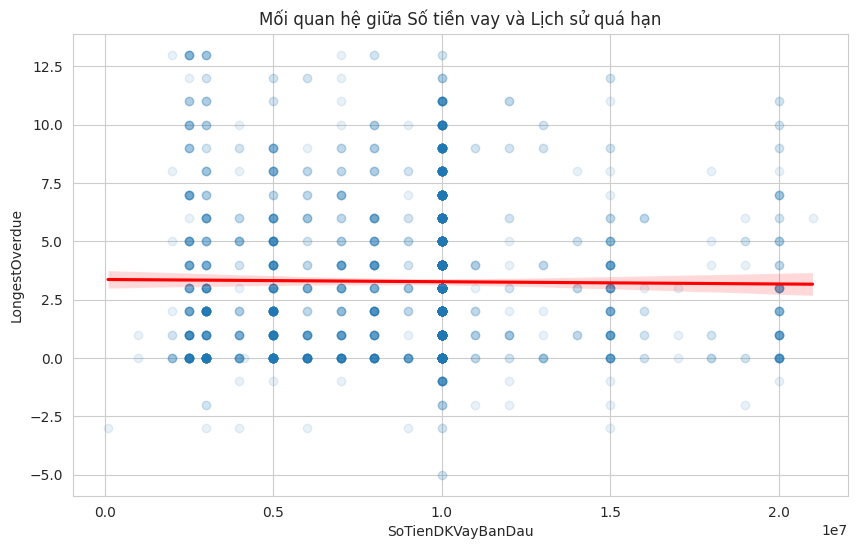

In [14]:
loan_overdue_corr = df[['SoTienDKVayBanDau', 'LongestOverdue']].corr().iloc[0,1]
print(f"Hệ số tương quan giữa Số tiền vay và Lịch sử quá hạn: {loan_overdue_corr:.4f}")
sns.regplot(data=df, x='SoTienDKVayBanDau', y='LongestOverdue', scatter_kws={'alpha':0.1}, line_kws={'color':'red'}).set_title('Mối quan hệ giữa Số tiền vay và Lịch sử quá hạn')
plt.show()

- Kết quả: Hệ số tương quan là -0.0114.
- Nhận định: Có một mối tương quan dương rất yếu. Điều này cho thấy số tiền vay lớn không đồng nghĩa với việc khách hàng sẽ có lịch sử trả nợ tệ hơn. Tuy nhiên, khi kết hợp với các yếu tố khác, nó vẫn có thể là một phần của rủi ro.

# 4. Kiểm tra Mối quan hệ Nhân quả (Exploring Causality)

1. Dựa trên các phân tích tương quan, chúng ta thấy Thu nhập và Số tiền vay có vẻ là những yếu tố quan trọng. Liệu chúng có phải là nguyên nhân gây ra nợ xấu?
2. Mối quan hệ giữa Thu nhập và Nợ xấu:
* Phân tích ở mục 3 (câu 25) cho thấy rõ ràng nhóm khách hàng có thu nhập thấp hơn có tỷ lệ nợ xấu cao hơn. Điều này ủng hộ mạnh mẽ giả thuyết rằng khả năng tài chính (đại diện bằng thu nhập) là một nguyên nhân cốt lõi dẫn đến khả năng trả nợ.
3. Mối quan hệ giữa Số tiền vay và Nợ xấu:
* Phân tích ở mục 3 (câu 8) cho thấy các khoản vay lớn hơn có xu hướng rủi ro hơn. Điều này có thể được giải thích là: một khoản vay lớn tạo ra áp lực trả nợ lớn hơn, đặc biệt với những khách hàng có thu nhập không tương xứng.

# 5.Chẩn đoán Nguyên nhân Gốc rễ

Từ các phân tích trên, chúng ta có thể chẩn đoán các nguyên nhân gốc rễ dẫn đến nợ xấu tại **TIMA**:

1. **Hồ sơ Tài chính Yếu**: Khách hàng có **thu nhập thấp** và **không ổn định** (ví dụ: nhận lương tiền mặt) là nhóm có nguy cơ cao nhất. Khả năng trả nợ của họ thấp và dễ bị ảnh hưởng bởi các biến động tài chính cá nhân.

2. **Sản phẩm có Rủi ro Nội tại**: Một số sản phẩm như **"Cầm cố xe máy KCC"** tự nó đã thu hút tệp khách hàng có rủi ro cao hơn và tài sản đảm bảo kém an toàn, dẫn đến tỷ lệ nợ xấu vượt trội.

3. **Thẩm định chưa Tối ưu**: Việc duyệt các khoản vay **quá lớn so với thu nhập** của khách hàng làm tăng gánh nặng trả nợ và đẩy họ vào tình trạng vỡ nợ.

4. **Yếu tố Vùng miền**: Có sự khác biệt về rủi ro giữa các khu vực địa lý, cho thấy có thể có những yếu tố kinh tế - xã hội đặc thù chưa được đánh giá hết trong quá trình thẩm định.


# 6. Kiểm tra Giả thuyết

- **Giả thuyết 1:** Khách hàng có thu nhập thấp sẽ dễ gặp tình trạng nợ xấu.  
  - **Kiểm tra:** Biểu đồ boxplot (câu 25) cho thấy phân phối thu nhập của nhóm "Nợ Xấu" lệch hẳn về phía dưới so với nhóm "Kết thúc". **Giả thuyết này được xác nhận**.

- **Giả thuyết 2:** Khách hàng vay số tiền lớn có khả năng nợ xấu cao hơn.  
  - **Kiểm tra:** Biểu đồ boxplot (câu 8) cho thấy trung vị và khoảng phân vị của số tiền vay ở nhóm "Nợ Xấu" cao hơn nhóm "Kết thúc". **Giả thuyết này được xác nhận**.